In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Multi-nomial Naive Bayes


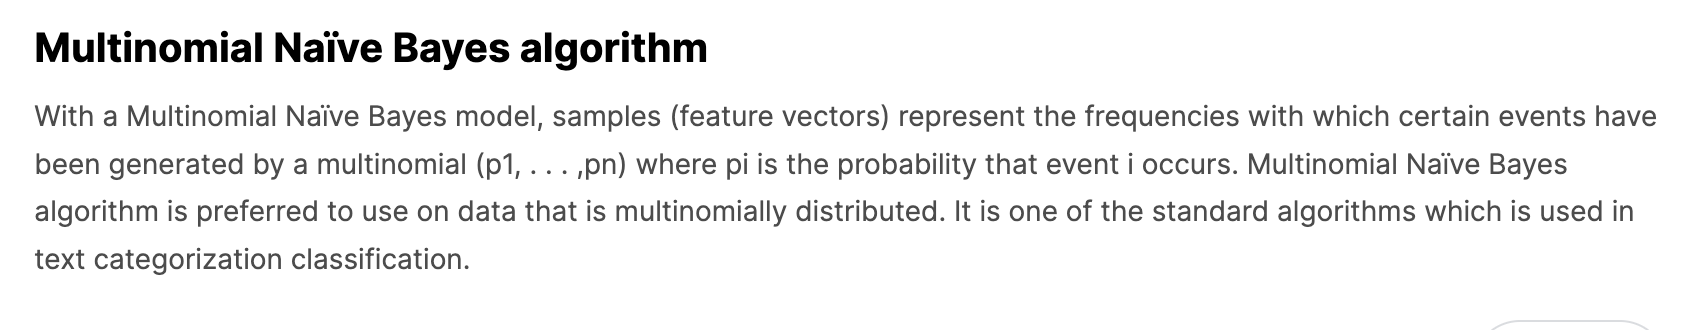

The multi-nomial classifier uses the likelihood criteria to find out the classes based on the likelihood hood comparison. 
Consider receiving the emails in ur mailbox and those are classified as Spam and not Spam. There are a couple of words occuring in both. 

The decision is done based on the likelihood of the prior likelihood ( probability of the main class) and the words occuring in those classes.

Let's say we received a total of 12 emails
1. 8 Not Spam | pr (Not Spam) = count (Not Spam) / Total Messages = 8/12 = 0.67
2. 4 Spam | pr (Spam) = count (Spam) / Total Messages = 4/12 = 0.33

and the words occuring in these 2 types are;
1. Dear
2. Friend
3. Lunch
4. Money

For 8 Not Spam messages, below is the count of words;
1. Dear - 8
    pr(Dear | Not Spam) = count (Dear) / count (Total) = 8/17 = 0.47
2. Friend - 5
    pr(Dear | Not Spam) = count (Friend) / count (Total) = 5/17 = 0.29
3. Lunch - 3
    pr(Dear | Not Spam) = count (Lunch) / count (Total) = 3/17 = 0.18
4. Money - 1
    pr(Dear | Not Spam) = count (Money) / count (Total) = 1/17 = 0.05

For 4 Spam messages, below is the count of words;
1. Dear - 2
    pr(Dear | Spam) = count (Dear) / count (Total) = 2/7 = 0.29
2. Friend - 1
    pr(Dear | Spam) = count (Friend) / count (Total) = 1/7 = 0.14
3. Lunch - 0
    pr(Dear | Spam) = count (Spam) / count (Total) = 0/7 = 0
4. Money - 4
    pr(Dear | Spam) = count (Money) / count (Total) = 4/7 = 0.57
    
#### Note: Because we have calculated the probabilities of discrete individuals words but not of the continous words, these probabilities are also called as Likelihoods.

Now Let's say that we have to classify a word "Dear Friend"
We start with the initial guess that it's a Not Spam message. This initial guess is called Prior Probability.
Let's check first for the pr Not Spam class:

  Pr(Not Spam) * Pr(Dear | Not Spam) * Pr (Friend | Not Spam)
  
  0.67 * 0.47 * 0.29 = 0.091321

Then we check for the pr Spam class;
  
  Pr(Spam) * Pr(Dear | Spam) * Pr (Friend | Spam)
  
  0.33 * 0.29 * 0.14 = 0.013398
  

Let's check for the word "Lunch Money Money Money Money"

For Not Spam:

  Pr(Not Spam) * Pr(Lunch | Not Spam) * Pr (Money | Not Spam) ^ 4
  
  0.67 * 0.18 * 0.05 ^ 4 = 0.000002

Then we check for the pr Spam class;
  
  Pr(Spam) * Pr(Lunch | Spam) * Pr (Money | Spam)
  
  0.33 * 0.0 * 0.57 ^ 4 = 0.0
  
  0.000002 > 0.0 so the message will be marked as Not Spam, although it is incorrect.
  
Reason being there is "Lunch" word in Spam Message is not existing and it clears out all the other probabilities leading to 0.

A solution to this is manually add one or more words to every word to avoid this case. This is represented by a Greek Letter <b> Alpha </b>. 

In this case, we set Alpha = 1. But it can be any number.

The probabilities of the words now change because of the additional Alpha value added to words. But the prior probability of Spam and Not Spam class remain the same.


For 8 Not Spam messages, below is the count of words;
1. Dear - 9
    pr(Dear | Not Spam) = count (Dear) / count (Total) = 9/21 = 0.42
2. Friend - 6
    pr(Dear | Not Spam) = count (Friend) / count (Total) = 5/21 = 0.23
3. Lunch - 4
    pr(Dear | Not Spam) = count (Lunch) / count (Total) = 3/21 = 0.14
4. Money - 2
    pr(Dear | Not Spam) = count (Money) / count (Total) = 2/21 = 0.09

For 4 Spam messages, below is the count of words;
1. Dear - 3
    pr(Dear | Spam) = count (Dear) / count (Total) = 3/11 = 0.27
2. Friend - 2
    pr(Dear | Spam) = count (Friend) / count (Total) = 2/11 = 0.18
3. Lunch - 1
    pr(Dear | Spam) = count (Spam) / count (Total) = 1/11 = 0.09
4. Money - 5
    pr(Dear | Spam) = count (Money) / count (Total) = 5/11 = 0.45
    
Let's check again for the word "Lunch Money Money Money Money"

For Not Spam:

  Pr(Not Spam) * Pr(Lunch | Not Spam) * Pr (Money | Not Spam) ^ 4
  
  0.67 * 0.14 * 0.09 ^ 4 = 0.000001

Then we check for the pr Spam class;
  
  Pr(Spam) * Pr(Lunch | Spam) * Pr (Money | Spam)
  
  0.33 * 0.09 * 0.45 ^ 4 = 0.0012
  
  0.0012 > 0.000001 so the message will now be marked as Spam.
  

#### Naive bayes ignores the order of words
The probability of Dear Friend is equal to the probability of Friend Dear

pr(N) * pr(Lunch) * pr(Money) = pr(N) * pr(Money) * pr(Lunch)



### Guassian Naive Bayes

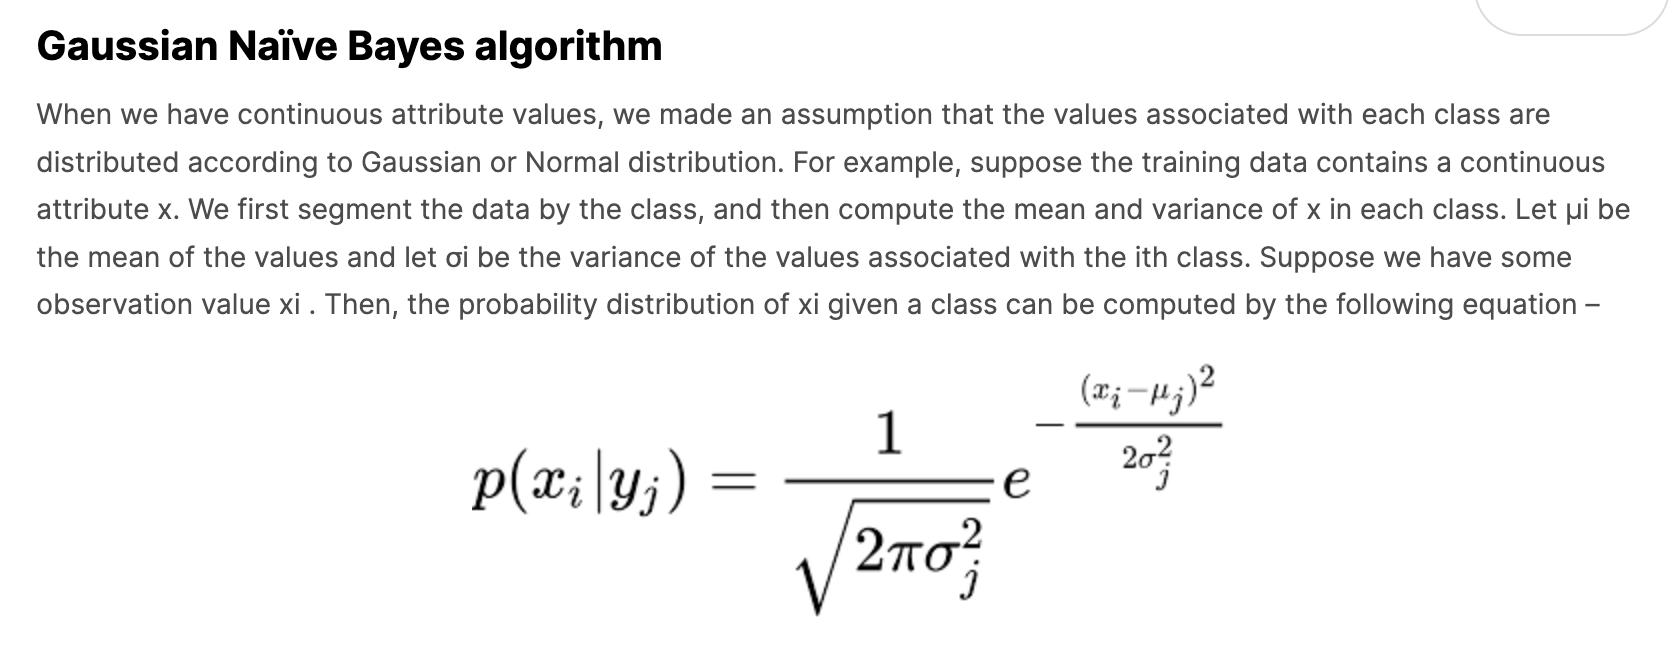

The Guassian Naive Bayes is named after the Guassian Normal Distribution. It uses the likelihood of the continuos variable value (from the y-axis) of a normal distribution of features and finds the probability of the new record for classification.

Let's take an example, there are 3 features;
#### for +ive Class
1. PopCorn - mean=24 | std=4
2. SodaPop - ...
3. Candy

#### for -ive Class
1. PopCorn - mean=4 | std=2
2. SodaPop - ...
3. Candy - ...

#### Now someone new shows up and says they eat 20g Popcorn, 500 ml of Soda and 25 grams candy. The points are shown as "X" in the below image:
 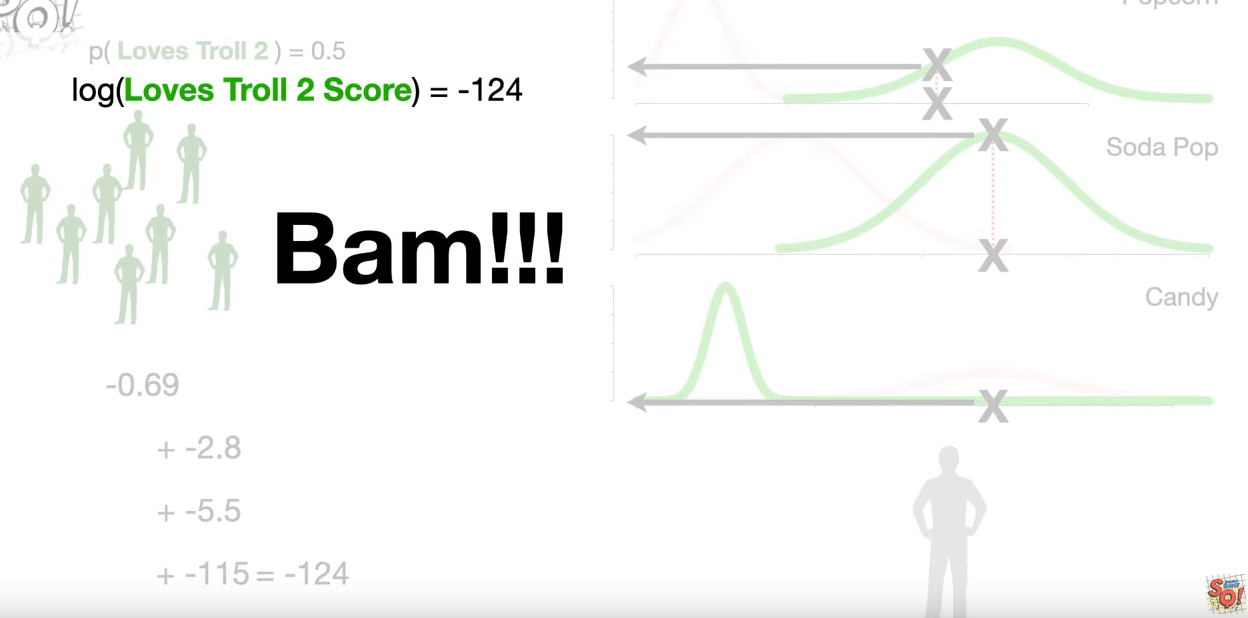
 
we can calculate it as:
###### for +ive class
Pr(+ive class | P) * Pr(PopCorn | P) * Pr(SodaPop | P) * Pr (Candy | P)
###### for the prior class, we take the pr of instance of 2 classes: let's say there are 8 observations of each so (8+8)/16 = 0.5

0.5 * 0.006 * 0.004 * a really small number

##### we sometimes go across really small numbers where the probability/likelihood of a number is really small i.e. Overflow
##### To avoid this issue, we use log method.
ln (0.5 * 0.006 * 0.004 * a really small number)
###### It can be any Log but we usually use log with base e
ln(0.5) + ln(0.006) + ln(0.004) + ln(a really small number)

-0.69 -2.8 - 5.5 - 115

-124


###### for -ive class
Pr(-ive class) * Pr(PopCorn | N) * Pr(SodaPop | N) * Pr (Candy | N)
###### for the prior class, we take the pr of instance of 2 classes: let's say there are 8 observations of each so (8+8)/16 = 0.5

0.5 * a tiny number * 0.000079 * 0.02

ln (0.5 * a tiny number * 0.000079 * 0.02)

ln(0.5) + ln(a tiny number) + ln(0.000079) + ln(0.02)

-0.69 -33.6 - 9.45 - 3.91

-48

#### - 48 > - 124 so the sample will be marked as -ive class...
